In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pathlib import Path



In [17]:
nombre_col = ['Illy','Mucilago','Cafeina','Ox','Mi','Ch','Go','Verde']
file = pd.read_csv('Data/reflectancia2025.csv',engine='python',nrows=2314)

columnas_impares = file.columns[1::2] #a partir de columna 1, solo las impares
print(columnas_impares)
file



Index(['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9',
       'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17',
       'Unnamed: 19', 'Unnamed: 21', 'Unnamed: 23', 'Unnamed: 25',
       'Unnamed: 27', 'Unnamed: 29', 'Unnamed: 31'],
      dtype='object')


,Baseline 100%T,Unnamed: 1,Illy,Unnamed: 3,Mucilago,Unnamed: 5,Cafeina,Unnamed: 7,Ox,Unnamed: 9,...,Unnamed: 23,C4,Unnamed: 25,OFL1,Unnamed: 27,OFL2,Unnamed: 29,OFL3,Unnamed: 31,Unnamed: 32
0,Wavelength (nm),%R,Wavelength (nm),%R,Wavelength (nm),%R,Wavelength (nm),%R,Wavelength (nm),%R,...,%R,Wavelength (nm),%R,Wavelength (nm),%R,Wavelength (nm),%R,Wavelength (nm),%R,NaN
1,2500,33.97133255,2500,56.83333206,2500,63.69066238,2500,60.84210968,2500,57.72837448,...,74.95654297,2500,57.83764648,2500,118.0865402,2500,162.1624451,2500,91.10678101,NaN
2,2499,33.51974487,2499,59.56877899,2499,63.32748032,2499,62.39562225,2499,59.79995728,...,76.62416077,2499,58.92493057,2499,120.336937,2499,164.0137939,2499,92.60704803,NaN
3,2498,34.33873367,2498,57.4720192,2498,62.68821335,2498,61.73552322,2498,56.83675385,...,75.21453857,2498,59.00728607,2498,116.4318771,2498,159.7586212,2498,89.64430237,NaN
4,2497,34.06510162,2497,58.02315903,2497,63.13122559,2497,62.29382706,2497,58.36898041,...,74.96259308,2497,58.71603394,2497,118.0278931,2497,161.2585602,2497,90.90940094,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,193,9.9877491,193,42.00708771,193,44.8935318,193,99.20272064,193,49.87791824,...,55.01416397,193,60.58716583,193,124.5222931,193,57.37381744,193,60.16477203,NaN
2309,192,10.287673,192,42.2476387,192,45.24890518,192,97.09065247,192,49.52963638,...,52.85314941,192,57.24411011,192,95.83548737,192,49.88446045,192,55.66126633,NaN
2310,191,10.02512455,191,42.80335236,191,44.50233841,191,94.1362381,191,49.98532104,...,52.1865654,191,59.71887207,191,-36.07532883,191,64.58695221,191,57.63156891,NaN
2311,190,10.3770647,190,39.9671669,190,44.59405136,190,96.77281189,190,49.10914993,...,48.23093796,190,56.9393692,190,150.6410828,190,41.89178085,190,55.06272125,NaN


In [18]:
file.drop(axis=0, index=0,inplace=True)
file


,Baseline 100%T,Unnamed: 1,Illy,Unnamed: 3,Mucilago,Unnamed: 5,Cafeina,Unnamed: 7,Ox,Unnamed: 9,...,Unnamed: 23,C4,Unnamed: 25,OFL1,Unnamed: 27,OFL2,Unnamed: 29,OFL3,Unnamed: 31,Unnamed: 32
1,2500,33.97133255,2500,56.83333206,2500,63.69066238,2500,60.84210968,2500,57.72837448,...,74.95654297,2500,57.83764648,2500,118.0865402,2500,162.1624451,2500,91.10678101,NaN
2,2499,33.51974487,2499,59.56877899,2499,63.32748032,2499,62.39562225,2499,59.79995728,...,76.62416077,2499,58.92493057,2499,120.336937,2499,164.0137939,2499,92.60704803,NaN
3,2498,34.33873367,2498,57.4720192,2498,62.68821335,2498,61.73552322,2498,56.83675385,...,75.21453857,2498,59.00728607,2498,116.4318771,2498,159.7586212,2498,89.64430237,NaN
4,2497,34.06510162,2497,58.02315903,2497,63.13122559,2497,62.29382706,2497,58.36898041,...,74.96259308,2497,58.71603394,2497,118.0278931,2497,161.2585602,2497,90.90940094,NaN
5,2496,34.06884766,2496,57.782547,2496,63.51060104,2496,62.49550629,2496,58.12596512,...,73.94547272,2496,59.40349197,2496,118.8245316,2496,162.0633392,2496,91.15583038,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,193,9.9877491,193,42.00708771,193,44.8935318,193,99.20272064,193,49.87791824,...,55.01416397,193,60.58716583,193,124.5222931,193,57.37381744,193,60.16477203,NaN
2309,192,10.287673,192,42.2476387,192,45.24890518,192,97.09065247,192,49.52963638,...,52.85314941,192,57.24411011,192,95.83548737,192,49.88446045,192,55.66126633,NaN
2310,191,10.02512455,191,42.80335236,191,44.50233841,191,94.1362381,191,49.98532104,...,52.1865654,191,59.71887207,191,-36.07532883,191,64.58695221,191,57.63156891,NaN
2311,190,10.3770647,190,39.9671669,190,44.59405136,190,96.77281189,190,49.10914993,...,48.23093796,190,56.9393692,190,150.6410828,190,41.89178085,190,55.06272125,NaN


In [19]:
# Invertir el orden de las filas
file = file.iloc[::-1].reset_index(drop=True)
file

,Baseline 100%T,Unnamed: 1,Illy,Unnamed: 3,Mucilago,Unnamed: 5,Cafeina,Unnamed: 7,Ox,Unnamed: 9,...,Unnamed: 23,C4,Unnamed: 25,OFL1,Unnamed: 27,OFL2,Unnamed: 29,OFL3,Unnamed: 31,Unnamed: 32
0,189,9.88144207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,190,10.3770647,190,39.9671669,190,44.59405136,190,96.77281189,190,49.10914993,...,48.23093796,190,56.9393692,190,150.6410828,190,41.89178085,190,55.06272125,NaN
2,191,10.02512455,191,42.80335236,191,44.50233841,191,94.1362381,191,49.98532104,...,52.1865654,191,59.71887207,191,-36.07532883,191,64.58695221,191,57.63156891,NaN
3,192,10.287673,192,42.2476387,192,45.24890518,192,97.09065247,192,49.52963638,...,52.85314941,192,57.24411011,192,95.83548737,192,49.88446045,192,55.66126633,NaN
4,193,9.9877491,193,42.00708771,193,44.8935318,193,99.20272064,193,49.87791824,...,55.01416397,193,60.58716583,193,124.5222931,193,57.37381744,193,60.16477203,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,2496,34.06884766,2496,57.782547,2496,63.51060104,2496,62.49550629,2496,58.12596512,...,73.94547272,2496,59.40349197,2496,118.8245316,2496,162.0633392,2496,91.15583038,NaN
2308,2497,34.06510162,2497,58.02315903,2497,63.13122559,2497,62.29382706,2497,58.36898041,...,74.96259308,2497,58.71603394,2497,118.0278931,2497,161.2585602,2497,90.90940094,NaN
2309,2498,34.33873367,2498,57.4720192,2498,62.68821335,2498,61.73552322,2498,56.83675385,...,75.21453857,2498,59.00728607,2498,116.4318771,2498,159.7586212,2498,89.64430237,NaN
2310,2499,33.51974487,2499,59.56877899,2499,63.32748032,2499,62.39562225,2499,59.79995728,...,76.62416077,2499,58.92493057,2499,120.336937,2499,164.0137939,2499,92.60704803,NaN


In [20]:
file2 = file[columnas_impares]
file2.drop(columns=['Unnamed: 1','Unnamed: 19', 'Unnamed: 21', 'Unnamed: 23', 'Unnamed: 25',
       'Unnamed: 27', 'Unnamed: 29', 'Unnamed: 31'], inplace=True) #eliminamos las columnas de C1,C2...

print(file2)

file2.rename(columns=dict(zip(file2.columns, nombre_col)), inplace=True)
file2.fillna(0,inplace=True)
file2.insert(0,'Wavelength',file['Baseline 100%T'])
file2

       Unnamed: 3   Unnamed: 5   Unnamed: 7   Unnamed: 9  Unnamed: 11  \
0             NaN          NaN          NaN          NaN          NaN   
1      39.9671669  44.59405136  96.77281189  49.10914993   53.6247139   
2     42.80335236  44.50233841   94.1362381  49.98532104  54.11322021   
3      42.2476387  45.24890518  97.09065247  49.52963638  50.03157425   
4     42.00708771   44.8935318  99.20272064  49.87791824  53.32870483   
...           ...          ...          ...          ...          ...   
2307    57.782547  63.51060104  62.49550629  58.12596512  59.05467987   
2308  58.02315903  63.13122559  62.29382706  58.36898041  59.33632278   
2309   57.4720192  62.68821335  61.73552322  56.83675385  58.63284302   
2310  59.56877899  63.32748032  62.39562225  59.79995728  59.85511398   
2311  56.83333206  63.69066238  60.84210968  57.72837448  59.75899124   

      Unnamed: 13  Unnamed: 15  Unnamed: 17  
0             NaN          NaN          NaN  
1     56.10119247   49.2641716 

C:\Users\lizor\AppData\Local\Temp\ipykernel_16012\1873566303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file2.drop(columns=['Unnamed: 1','Unnamed: 19', 'Unnamed: 21', 'Unnamed: 23', 'Unnamed: 25',
C:\Users\lizor\AppData\Local\Temp\ipykernel_16012\1873566303.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file2.rename(columns=dict(zip(file2.columns, nombre_col)), inplace=True)
C:\Users\lizor\AppData\Local\Temp\ipykernel_16012\1873566303.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,Wavelength,Illy,Mucilago,Cafeina,Ox,Mi,Ch,Go,Verde
0,189,0,0,0,0,0,0,0,0
1,190,39.9671669,44.59405136,96.77281189,49.10914993,53.6247139,56.10119247,49.2641716,57.66826248
2,191,42.80335236,44.50233841,94.1362381,49.98532104,54.11322021,56.54802322,59.62401581,56.56570053
3,192,42.2476387,45.24890518,97.09065247,49.52963638,50.03157425,55.00058365,52.67517471,55.35513306
4,193,42.00708771,44.8935318,99.20272064,49.87791824,53.32870483,56.93517303,54.81307983,55.92965317
...,...,...,...,...,...,...,...,...,...
2307,2496,57.782547,63.51060104,62.49550629,58.12596512,59.05467987,59.19444656,64.58488464,66.53691864
2308,2497,58.02315903,63.13122559,62.29382706,58.36898041,59.33632278,59.46430588,64.88829041,66.53473663
2309,2498,57.4720192,62.68821335,61.73552322,56.83675385,58.63284302,59.94728851,63.93445587,65.9045105
2310,2499,59.56877899,63.32748032,62.39562225,59.79995728,59.85511398,60.078125,64.71910095,67.978302


## Graficamos Reflectancia

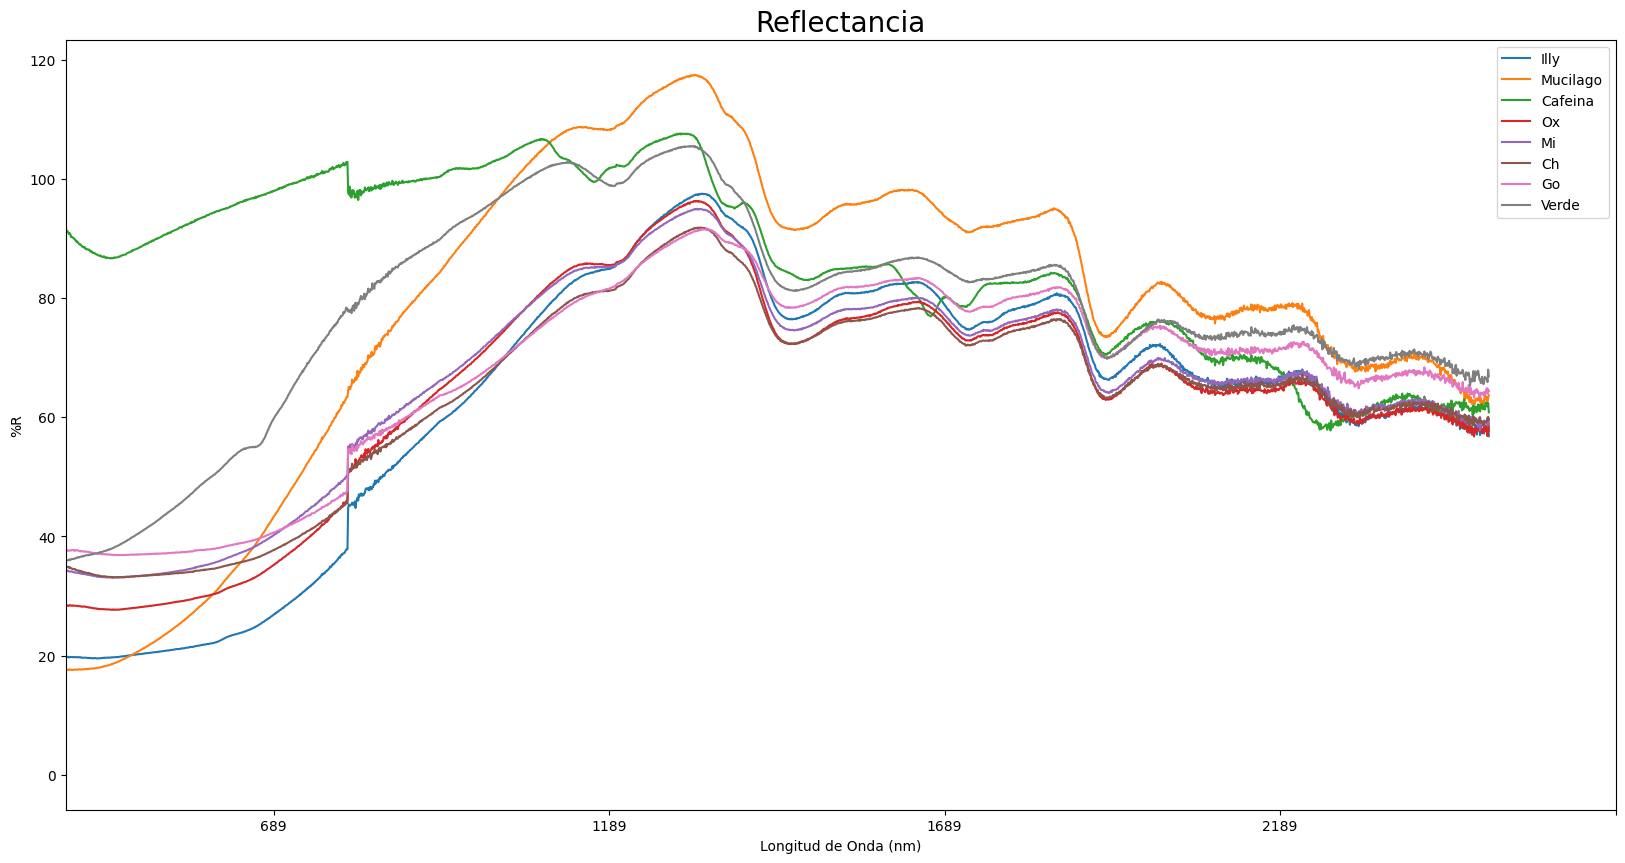

In [21]:
fig, ax1 = plt.subplots(figsize=(20,10))

df = file2


for col in file2.columns[1:]:  #[1:] la primera columna sera x
    name = col
    ax1.plot(df['Wavelength'], df[name], label=name)

ax1.set_title("Reflectancia", fontsize=20)
ax1.set_xlabel('Longitud de Onda (nm)')
ax1.set_ylabel('%R')
ax1.legend(loc='upper right')

ax1.set_xlim(190,2500)
ax1.set_xticks([500, 1000, 1500,2000, 2500])


plt.show()

In [22]:
#cleaning file2
#file2.fillna(0, inplace=True)
#file2.isnull().sum()


In [23]:

file2 = file2.apply(pd.to_numeric, errors='coerce')
print(file2.dtypes)
file2

Wavelength      int64
Illy          float64
Mucilago      float64
Cafeina       float64
Ox            float64
Mi            float64
Ch            float64
Go            float64
Verde         float64
dtype: object


,Wavelength,Illy,Mucilago,Cafeina,Ox,Mi,Ch,Go,Verde
0,189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,190,39.967167,44.594051,96.772812,49.109150,53.624714,56.101192,49.264172,57.668262
2,191,42.803352,44.502338,94.136238,49.985321,54.113220,56.548023,59.624016,56.565701
3,192,42.247639,45.248905,97.090652,49.529636,50.031574,55.000584,52.675175,55.355133
4,193,42.007088,44.893532,99.202721,49.877918,53.328705,56.935173,54.813080,55.929653
...,...,...,...,...,...,...,...,...,...
2307,2496,57.782547,63.510601,62.495506,58.125965,59.054680,59.194447,64.584885,66.536919
2308,2497,58.023159,63.131226,62.293827,58.368980,59.336323,59.464306,64.888290,66.534737
2309,2498,57.472019,62.688213,61.735523,56.836754,58.632843,59.947289,63.934456,65.904511
2310,2499,59.568779,63.327480,62.395622,59.799957,59.855114,60.078125,64.719101,67.978302


In [24]:
#creando un df con los valores de Absorbancia (reflectancia transformada)
#se usara la formula A = 1/log10(R)

file_abs = 1 / np.log10(file2.iloc[:, :]) 
file_abs.drop(columns=["Wavelength"],inplace=True)
file_abs

c:\Users\lizor\OneDrive\Documentos\cafelab\CafeLab\Liz\.venv\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


,Illy,Mucilago,Cafeina,Ox,Mi,Ch,Go,Verde
0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
1,0.624335,0.606326,0.503587,0.591309,0.578247,0.571764,0.590831,0.567880
2,0.612941,0.606655,0.506648,0.588636,0.576933,0.570640,0.563247,0.570596
3,0.615081,0.604008,0.503226,0.590017,0.588497,0.574591,0.580853,0.573671
4,0.616021,0.605260,0.500871,0.588960,0.579052,0.569677,0.575081,0.572200
...,...,...,...,...,...,...,...,...
2307,0.567602,0.554678,0.556840,0.566774,0.564572,0.564245,0.552446,0.548527
2308,0.567022,0.555480,0.557275,0.566193,0.563914,0.563616,0.551826,0.548532
2309,0.568357,0.556425,0.558492,0.569921,0.565566,0.562503,0.553791,0.549778
2310,0.563374,0.555065,0.557055,0.562841,0.562714,0.562203,0.552171,0.545741


In [25]:
#agregando la columna wavelength a file_abs

file_abs.insert(0, 'Wavelength', file['Baseline 100%T'])
file_abs

,Wavelength,Illy,Mucilago,Cafeina,Ox,Mi,Ch,Go,Verde
0,189,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
1,190,0.624335,0.606326,0.503587,0.591309,0.578247,0.571764,0.590831,0.567880
2,191,0.612941,0.606655,0.506648,0.588636,0.576933,0.570640,0.563247,0.570596
3,192,0.615081,0.604008,0.503226,0.590017,0.588497,0.574591,0.580853,0.573671
4,193,0.616021,0.605260,0.500871,0.588960,0.579052,0.569677,0.575081,0.572200
...,...,...,...,...,...,...,...,...,...
2307,2496,0.567602,0.554678,0.556840,0.566774,0.564572,0.564245,0.552446,0.548527
2308,2497,0.567022,0.555480,0.557275,0.566193,0.563914,0.563616,0.551826,0.548532
2309,2498,0.568357,0.556425,0.558492,0.569921,0.565566,0.562503,0.553791,0.549778
2310,2499,0.563374,0.555065,0.557055,0.562841,0.562714,0.562203,0.552171,0.545741


In [26]:
# generando un csv con los nuevos datos de absorbancia
file_abs.to_csv('abs_reflectancia2025.csv',index=False)


## Graficando

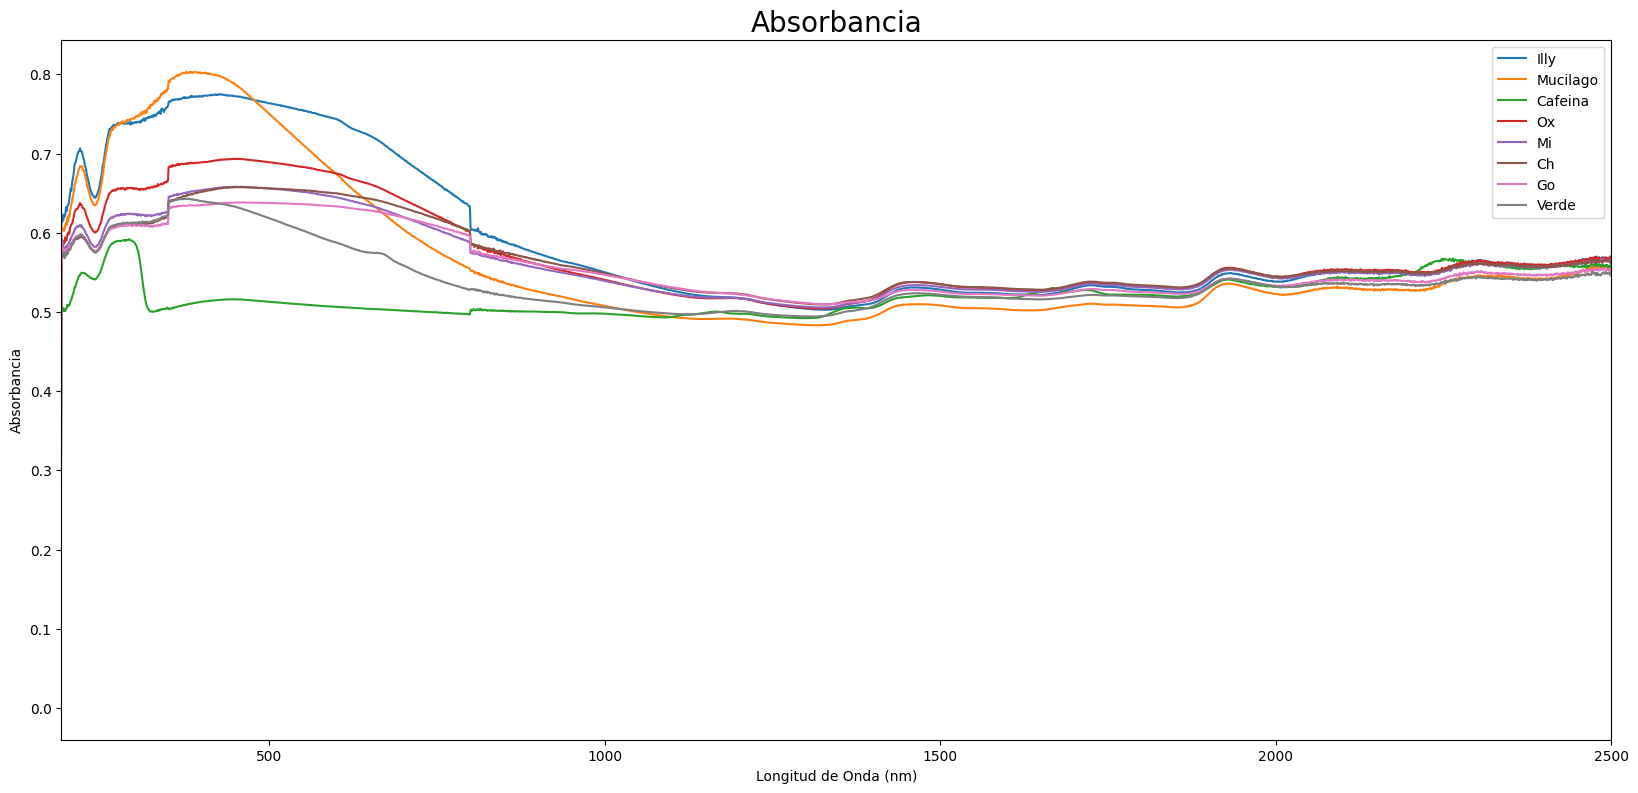

In [27]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2, 1, 1)

file_abs['Wavelength'] = pd.to_numeric(file_abs['Wavelength'],errors = 'coerce')


# Absorbancia
for col in file_abs.columns[1:]:
    df = file_abs
    #print(df)
    #print(col)
    name = col
    ax1.plot(df['Wavelength'], df[name],  label=name)

ax1.set_title("Absorbancia", fontsize=20)
ax1.set_xlabel('Longitud de Onda (nm)')
ax1.set_ylabel('Absorbancia')
ax1.legend(loc='upper right')

ax1.set_xlim(190,2500)
ax1.set_xticks([500, 1000, 1500,2000, 2500])


#plt.tight_layout()
plt.show()

## Acotemos ahora de [200,400] para compararlas con las de Absorbancia

In [39]:
file_abs_acota = file_abs[(file_abs["Wavelength"]>200) & (file_abs["Wavelength"] <= 400)]
file_abs_acota

,Wavelength,Illy,Mucilago,Cafeina,Ox,Mi,Ch,Go,Verde
12,201,0.637088,0.621779,0.508351,0.601153,0.585903,0.579958,0.581645,0.579322
13,202,0.642052,0.620114,0.508556,0.598713,0.588138,0.578118,0.581394,0.579517
14,203,0.648467,0.627105,0.511096,0.606110,0.591761,0.581074,0.584093,0.578441
15,204,0.655652,0.630644,0.514084,0.607993,0.591523,0.584207,0.583700,0.580200
16,205,0.652796,0.636613,0.515397,0.610483,0.593835,0.586243,0.585464,0.583042
...,...,...,...,...,...,...,...,...,...
207,396,0.771849,0.802051,0.512297,0.688453,0.653336,0.651226,0.634324,0.640138
208,397,0.772504,0.802594,0.512484,0.688939,0.653670,0.651391,0.634673,0.640232
209,398,0.772216,0.801798,0.512665,0.688753,0.653612,0.651599,0.634688,0.639945
210,399,0.771948,0.801393,0.512915,0.688879,0.653862,0.651433,0.634898,0.640250


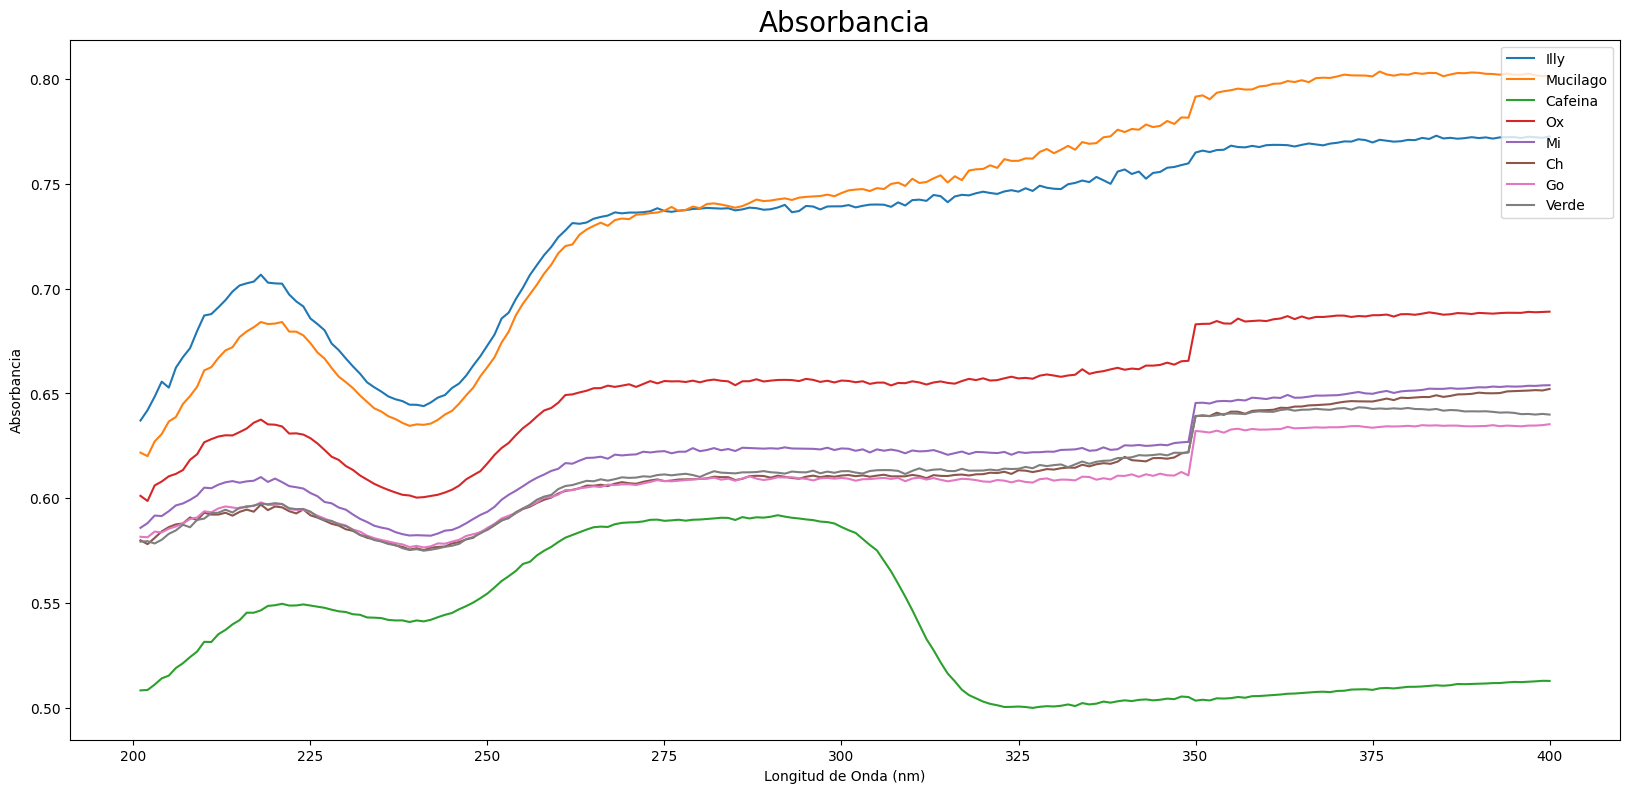

In [29]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2, 1, 1)

df = file_abs_acota

# Absorbancia
for col in df.columns[1:]:
    
    #print(df)
    #print(col)
    name = col
    ax1.plot(df['Wavelength'], df[name],  label=name)

ax1.set_title("Absorbancia", fontsize=20)
ax1.set_xlabel('Longitud de Onda (nm)')
ax1.set_ylabel('Absorbancia')
ax1.legend(loc='upper right')

#ax1.set_xlim(190,2500)
#ax1.set_xticks([500, 1000, 1500,2000, 2500])


#plt.tight_layout()
plt.show()

## Ahora unimos las gráficas de Absorbancia con las de Abs_reflectancia

In [30]:
# Cargar archivos de absorción
data_path = Path('Data')

try:
    ACh = pd.read_csv(data_path / 'AChMN.csv')
    AMi = pd.read_csv(data_path / 'AMi.csv')
    AGo = pd.read_csv(data_path / 'AGo.csv')
    AOx = pd.read_csv(data_path / 'AOx.csv')
    AIlly = pd.read_csv(data_path / 'AIlly.csv')
    
    print("Datos cargados exitosamente:")
    print(f"- ACh: {ACh.shape}")
    print(f"- AMi: {AMi.shape}")
    print(f"- AGo: {AGo.shape}")
    print(f"- AOx: {AOx.shape}")
    print(f"- AIlly: {AIlly.shape}")
    
except FileNotFoundError as e:
    print(f"Error al cargar archivos: {e}")
    print("Verifica que la carpeta 'Data' y los archivos CSV estén en la ubicación correcta")

Datos cargados exitosamente:
- ACh: (421, 5)
- AMi: (421, 5)
- AGo: (421, 5)
- AOx: (421, 5)
- AIlly: (421, 2)


In [31]:
# Preparación de datos de AIlly
# Agregamos las columnas 75, 18 y 225 a AIlly para evitar errores y que tenga las mismas columnas que los demás datos
AIlly['75'] = 0
AIlly['18'] = 0
AIlly['225'] = 0

# Reordenamos las columnas
AIlly = AIlly[['nm', '75', '15', '18', '225']]

print("Columnas de AIlly ajustadas:")
print(AIlly.columns.tolist())

Columnas de AIlly ajustadas:
['nm', '75', '15', '18', '225']


In [32]:
# Reemplazo de valores 0 por NaN
ACh = ACh.replace(0, np.nan)
AGo = AGo.replace(0, np.nan)
AMi = AMi.replace(0, np.nan)
AOx = AOx.replace(0, np.nan)
AIlly = AIlly.replace(0, np.nan)

print("Valores 0 reemplazados por NaN en todos los dataframes")

Valores 0 reemplazados por NaN en todos los dataframes


In [33]:
# Agregar columna de grupo a cada dataframe
AMi_copy = AMi.copy()
AGo_copy = AGo.copy()
ACh_copy = ACh.copy()
AOx_copy = AOx.copy()
AIlly_copy = AIlly.copy()

AMi_copy['grupo'] = 'AMi'
AGo_copy['grupo'] = 'AGo'
ACh_copy['grupo'] = 'ACh'
AOx_copy['grupo'] = 'AOx'
AIlly_copy['grupo'] = 'AIlly'

# Combinar todos los dataframes
df_todo = pd.concat([ACh_copy, AGo_copy, AIlly_copy, AMi_copy, AOx_copy], ignore_index=True)

print(f"Dataframe combinado creado con {df_todo.shape[0]} filas y {df_todo.shape[1]} columnas")
print(f"Grupos únicos: {df_todo['grupo'].unique()}")

Dataframe combinado creado con 2105 filas y 6 columnas
Grupos únicos: ['ACh' 'AGo' 'AIlly' 'AMi' 'AOx']


In [34]:
# Función para crear gráficas con bandas marcadas
def plot_absorbancia_con_bandas(df, columna, titulo):
    plt.figure(figsize=(14, 8))
    
    # Colores para cada grupo
    colors = {'ACh': 'blue', 'AGo': 'green', 'AIlly': 'purple', 'AMi': 'orange', 'AOx': 'red'}
    
    for grupo in df['grupo'].unique():
        data_grupo = df[df['grupo'] == grupo]
        plt.plot(data_grupo['nm'], data_grupo[columna], 
                label=grupo, color=colors.get(grupo, 'black'), linewidth=2)
    
    # Banda 1 (270-280 nm)
    plt.axvline(x=270, color='blue', linestyle='--', alpha=0.5)
    plt.axvline(x=280, color='blue', linestyle='--', alpha=0.5)
    plt.axvspan(270, 280, alpha=0.1, color='blue')
    
    # Banda 2 (320-330 nm)
    plt.axvline(x=320, color='red', linestyle='--', alpha=0.5)
    plt.axvline(x=330, color='red', linestyle='--', alpha=0.5)
    plt.axvspan(320, 330, alpha=0.1, color='red')
    
    plt.xlabel('Longitud de onda (nm)')
    plt.ylabel('Absorbancia')
    plt.title(titulo)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


    fig = plt.figure(figsize=(20,20))


## Juntemos el data frame de df_todo y file_abs_acota

In [ ]:
# Agregar columna de grupo a cada dataframe
AMi_copy = AMi.copy()
AGo_copy = AGo.copy()
ACh_copy = ACh.copy()
AOx_copy = AOx.copy()
AIlly_copy = AIlly.copy()

AMi_copy['grupo'] = 'AMi'
AGo_copy['grupo'] = 'AGo'
ACh_copy['grupo'] = 'ACh'
AOx_copy['grupo'] = 'AOx'
AIlly_copy['grupo'] = 'AIlly'

# Combinar todos los dataframes
df_todo = pd.concat([ACh_copy, AGo_copy, AIlly_copy, AMi_copy, AOx_copy], ignore_index=True)

print(f"Dataframe combinado creado con {df_todo.shape[0]} filas y {df_todo.shape[1]} columnas")
print(f"Grupos únicos: {df_todo['grupo'].unique()}")

,Wavelength,Illy,Mucilago,Cafeina,Ox,Mi,Ch,Go,Verde
12,201,0.637088,0.621779,0.508351,0.601153,0.585903,0.579958,0.581645,0.579322
13,202,0.642052,0.620114,0.508556,0.598713,0.588138,0.578118,0.581394,0.579517
14,203,0.648467,0.627105,0.511096,0.606110,0.591761,0.581074,0.584093,0.578441
15,204,0.655652,0.630644,0.514084,0.607993,0.591523,0.584207,0.583700,0.580200
16,205,0.652796,0.636613,0.515397,0.610483,0.593835,0.586243,0.585464,0.583042
...,...,...,...,...,...,...,...,...,...
207,396,0.771849,0.802051,0.512297,0.688453,0.653336,0.651226,0.634324,0.640138
208,397,0.772504,0.802594,0.512484,0.688939,0.653670,0.651391,0.634673,0.640232
209,398,0.772216,0.801798,0.512665,0.688753,0.653612,0.651599,0.634688,0.639945
210,399,0.771948,0.801393,0.512915,0.688879,0.653862,0.651433,0.634898,0.640250


In [38]:
df_todo

,nm,75,15,18,225,grupo
0,200.0,NaN,NaN,NaN,NaN,ACh
1,200.5,NaN,NaN,NaN,NaN,ACh
2,201.0,NaN,NaN,NaN,NaN,ACh
3,201.5,NaN,NaN,NaN,NaN,ACh
4,202.0,NaN,NaN,NaN,NaN,ACh
...,...,...,...,...,...,...
2100,408.0,NaN,NaN,NaN,NaN,AOx
2101,408.5,NaN,NaN,NaN,NaN,AOx
2102,409.0,NaN,NaN,NaN,NaN,AOx
2103,409.5,NaN,NaN,NaN,NaN,AOx


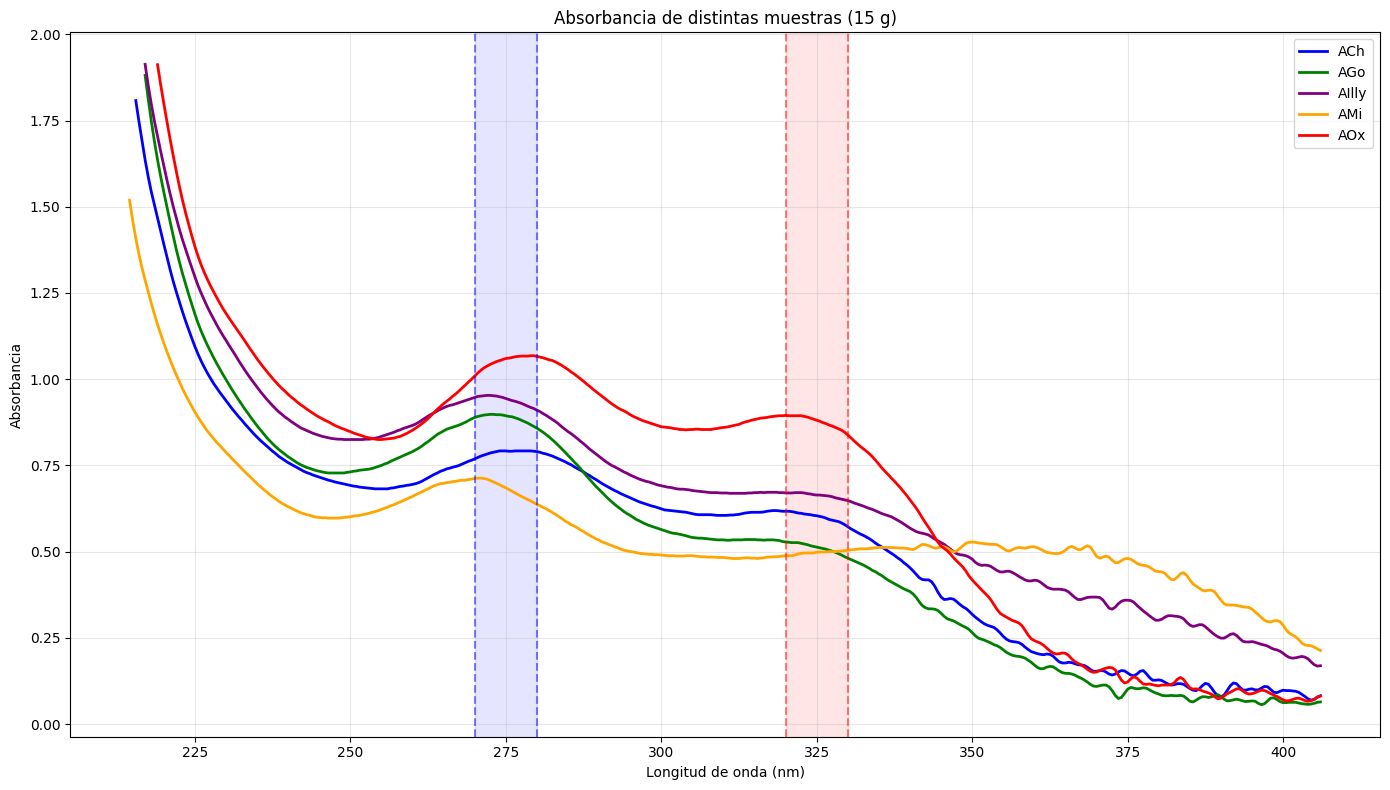

<Figure size 2000x2000 with 0 Axes>

In [36]:
plot_absorbancia_con_bandas(df_todo, '15', 'Absorbancia de distintas muestras (15 g)')

In [37]:
ax1 = fig.add_subplot(2, 1, 1)

df = file_abs_acota

# Absorbancia
for col in df.columns[1:]:
    
    #print(df)
    #print(col)
    name = col
    ax1.plot(df['Wavelength'], df[name],  label=name)




plt.show()
